In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
#Read the dataset 
#iris=pd.read_csv('irisknn.csv')
iris=pd.read_csv('Desktop/Irisknn.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
iris.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [4]:
iris.shape


(150, 5)

In [6]:
iris['variety'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

In [7]:
iris.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [8]:
iris.values


array([[5.1, 3.5, 1.4, 0.2, 'Setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Setosa'],
       [5.4, 3.7, 1.5, 0.2, 'Setosa'],
       [4.8, 3.4, 1.6, 0.2, 'Setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Setosa'],
       [5.8, 4.0, 1.2, 0.2, 'Setosa'],
       [5.7, 4.4, 1.5, 0.4, 'Setosa'],
       [5.4, 3.9, 1.3, 0.4, 'Setosa'],
       [5.1, 3.5, 1.4, 0.3, 'Setosa'],
       [5.7, 3.8, 1.7, 0.3, 'Setosa'],
       [5.1, 3.8, 1.5, 0.3, 'Setosa'],
       [5.4, 3.4, 1.7, 0.2, 'Setosa'],
       [5.1, 3.7, 1.5, 0.4, 'Setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Setosa'],
       [5.1, 3.3, 1.7, 0.5, 'Setosa'],
       [4.8, 3.4, 1.9, 0.2, 'Setosa'],
       [5.0, 3.0, 1.6, 0.

In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
iris.describe(include='all')

,sepal.length,sepal.width,petal.length,petal.width,variety
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [12]:
X=iris.iloc[:,:4]
X.head()


,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
y=iris.iloc[:,-1]

In [14]:
X = preprocessing.StandardScaler().fit_transform(X)
X[0:4]


array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ]])

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size= 0.3, random_state=1)
y_test.shape


(45,)

In [41]:
knnmodel=KNeighborsClassifier(n_neighbors=3)
knnmodel.fit(X_train, y_train)
y_predict1=knnmodel.predict(X_test)


In [42]:
from sklearn.metrics import accuracy_score

In [43]:
acc=accuracy_score(y_test, y_predict1)
acc


0.9777777777777777

In [44]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test.values, y_predict1)
cm


array([[14,  0,  0],
       [ 0, 18,  0],
       [ 0,  1, 12]])

In [45]:
cm1=pd.DataFrame(data=cm,index=['setosa', 'versicolor', 'virginica'], columns=['setosa', 'versicolor', 'virginica'])
cm1 


,setosa,versicolor,virginica
setosa,14,0,0
versicolor,0,18,0
virginica,0,1,12


In [46]:
prediction_output=pd.DataFrame(data=[y_test.values,y_predict1],index=['y_test','y_predict1'])
prediction_output

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
y_test,Setosa,Versicolor,Versicolor,Setosa,Virginica,Versicolor,Virginica,Setosa,Setosa,Virginica,...,Setosa,Versicolor,Setosa,Versicolor,Virginica,Virginica,Setosa,Virginica,Virginica,Versicolor
y_predict1,Setosa,Versicolor,Versicolor,Setosa,Virginica,Versicolor,Virginica,Setosa,Setosa,Virginica,...,Setosa,Versicolor,Setosa,Versicolor,Virginica,Virginica,Setosa,Versicolor,Virginica,Versicolor


In [47]:
prediction_output.iloc[0,:].value_counts()

Versicolor    18
Setosa        14
Virginica     13
Name: y_test, dtype: int64

In [48]:
Ks=21
mean_acc=np.zeros((Ks-1))

#train and predict
for n in range(1,Ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    y_hat=neigh.predict(X_test)
    mean_acc[n-1]=accuracy_score(y_test,y_hat)


In [49]:
print(mean_acc)

[0.95555556 0.95555556 0.97777778 0.95555556 0.95555556 0.97777778
 0.97777778 0.97777778 0.95555556 0.95555556 0.95555556 0.95555556
 0.95555556 0.95555556 0.95555556 0.95555556 0.93333333 0.95555556
 0.95555556 0.95555556]


In [50]:
print("The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9777777777777777 with k= 3


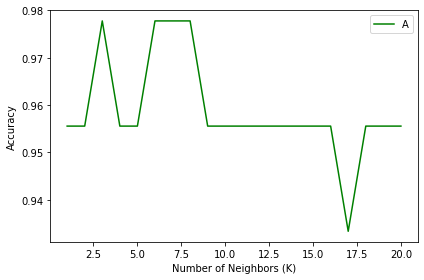

In [51]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.legend(('Accuracy'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()